In [1]:
cd

C:\Users\khenk


In [2]:
cd Desktop/ESS

C:\Users\khenk\Desktop\ESS


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [4]:
#read in datafile - all wells (2 million +) 
GIS_Data = pd.read_csv('NM_wells_status_A_clustered_50_meter_threshold.csv', sep=',', encoding = 'utf8')
data=pd.read_csv('AllWells_New.csv', sep=',', encoding = 'utf8')
SJ = pd.read_csv('SanJuanBasin.csv', sep=',', encoding = 'utf8')
Permian = pd.read_csv('PermianBasin.csv', sep=',', encoding = 'utf8')
NM_Wells2017 = pd.read_csv('2017_active_wells_NM.csv', encoding = 'utf8')


In [121]:
GIS_Data.head()

,API,API-OLD,WELLNAME,WELL_TYPE,ULSTR,OGRID,OGRID_NAME,STATUS,DIR_STATUS,ELEVATION,...,APR_DATE,LATITUDE,LONGITUDE,DISTRICT,POOL_ID_LI,SYMBOLOGY,URL,CLUSTER_ID,COUNT,FRACTION
0,3002506785,30-025-06785,S J SARKEYS B #001,G,B-26-21S-37E,184,ACOMA OIL CORP,A,V,3381,...,1/1/2000,32.455307,-103.131622,1,[6660] BLINEBRY OIL AND GAS (OIL); [60240] TUB...,GA,https://wwwapps.emnrd.state.nm.us/ocd/ocdpermi...,1,1,1.0
1,3002521920,30-025-21920,S J SARKEYS B #002,O,B-26-21S-37E,184,ACOMA OIL CORP,A,V,3395,...,10/31/1966,32.456215,-103.132690,1,[6660] BLINEBRY OIL AND GAS (OIL); [19190] DRI...,OA,https://wwwapps.emnrd.state.nm.us/ocd/ocdpermi...,2,1,1.0
2,3002521278,30-025-21278,S J SARKEYS A #001,O,A-26-21S-37E,184,ACOMA OIL CORP,A,V,3398,...,1/1/2000,32.456215,-103.128410,1,[6660] BLINEBRY OIL AND GAS (OIL); [19190] DRI...,OA,https://wwwapps.emnrd.state.nm.us/ocd/ocdpermi...,3,1,1.0
3,3001525468,30-015-25468,WHLPSU #010,O,I-18-16S-29E,1903,BEACH EXPLORATION INC,A,V,0,...,12/1/1985,32.919064,-104.106712,2,"[30780] HIGH LONESOME, QUEEN",OA,https://wwwapps.emnrd.state.nm.us/ocd/ocdpermi...,4,1,1.0
4,3001525364,30-015-25364,WHLPSU #022,O,D-20-16S-29E,1903,BEACH EXPLORATION INC,A,V,3636,...,9/1/1985,32.913620,-104.104561,2,"[30780] HIGH LONESOME, QUEEN",OA,https://wwwapps.emnrd.state.nm.us/ocd/ocdpermi...,5,1,1.0


In [ ]:
AllWells = pd.read_csv('AllWells-NMOCD.csv', encoding = 'utf8')

In [252]:
data.columns

Index(['ACRES', 'API', 'OPERATOR', 'PLUG_DATE', 'PRODUCING_POOLID', 'PROPERTY',
       'RANGE', 'SDIV_UL', 'SECTION', 'SPUD_DATE', 'TOWNSHIP', 'TVD_DEPTH',
       'water_inj_2017', 'water_inj_2018', 'water_inj_2019', 'water_prod_2017',
       'water_prod_2018', 'water_prod_2019', 'WELL_NAME', 'WELL_TYPE',
       'COMPL_STATUS', 'COUNTY', 'days_prod_2017', 'days_prod_2018',
       'days_prod_2019', 'ELEVGL', 'EW_CD', 'FTG_EW', 'FTG_NS',
       'gas_prod_2017', 'gas_prod_2018', 'gas_prod_2019', 'LAND_TYPE',
       'LAST_PROD_INJ', 'LATITUDE', 'LONGITUDE', 'NBR_COMPLS', 'NS_CD',
       'OCD_UL', 'OGRID_CDE', 'oil_prod_2017', 'oil_prod_2018',
       'oil_prod_2019', 'ONE_PRODUCING_POOL_NAME'],
      dtype='object')

In [5]:
data.drop(labels=['ACRES', 'OPERATOR', 'PRODUCING_POOLID', 'PROPERTY',
       'RANGE', 'SDIV_UL', 'SECTION', 'TOWNSHIP', 'TVD_DEPTH',
       'water_inj_2017', 'water_inj_2018', 'water_inj_2019', 'water_prod_2017',
       'water_prod_2018', 'water_prod_2019', 'WELL_NAME', 'WELL_TYPE',
       'days_prod_2017', 'days_prod_2018',
       'days_prod_2019', 'ELEVGL', 'EW_CD', 'FTG_EW', 'FTG_NS','LAND_TYPE',
       'LAST_PROD_INJ', 'LATITUDE', 'LONGITUDE', 'NBR_COMPLS', 'NS_CD',
       'OCD_UL', 'OGRID_CDE', 'ONE_PRODUCING_POOL_NAME'], axis=1, inplace=True)

In [6]:
data.COMPL_STATUS.unique()

array(['Plugged', nan, 'TA', 'Active', 'Dry Hole',
       'New (Not drilled or compl)', 'Zone Plugged',
       'Zones Aban, not plgd', 'Never Drilled'], dtype=object)

In [7]:
data['COMPL_STATUS'] = np.where(data['COMPL_STATUS'] == 'New (Not drilled or compl)', 'Active', data['COMPL_STATUS'])

In [7]:
GIS_Data_unique = GIS_Data.drop_duplicates(subset='API', keep='first')

In [13]:
data_active = data.loc[data['COMPL_STATUS'].isin(['Active'])]

In [683]:
data

,ACRES,API,OPERATOR,PLUG_DATE,PRODUCING_POOLID,PROPERTY,RANGE,SDIV_UL,SECTION,SPUD_DATE,...,LATITUDE,LONGITUDE,NBR_COMPLS,NS_CD,OCD_UL,OGRID_CDE,oil_prod_2017,oil_prod_2018,oil_prod_2019,ONE_PRODUCING_POOL_NAME
0,NaN,3000100505,NORINS REALTY,8/12/1940,NaN,28142,04E,F,19,2/15/1936,...,35.170802,-106.565295,NaN,N,F,196274,NaN,NaN,NaN,NaN
1,NaN,3000105000,SOUTHERN UNION PRODUCING COMPANY,3/21/1964,NaN,25786,05E,M,12,3/7/1964,...,35.102531,-106.363228,NaN,S,NaN,187163,NaN,NaN,NaN,NaN
2,NaN,3000105001,SOUTHERN UNION PRODUCTION CO,4/10/1964,NaN,28132,05E,E,12,3/27/1964,...,35.106044,-106.351710,NaN,N,E,196291,NaN,NaN,NaN,NaN
3,40.0,3000105002,SOUTHERN UNION PRODUCTION CO,5/12/1965,NaN,28132,05E,D,12,4/24/1964,...,35.111025,-106.363320,1.0,N,D,196291,NaN,NaN,NaN,NaN
4,NaN,3000105003,NORINS REALTY,2/23/1946,NaN,28128,01E,B,22,9/27/1938,...,35.000103,-106.823754,NaN,N,B,196274,NaN,NaN,NaN,NaN
5,NaN,3000105004,F H CARPENTER,9/29/1948,NaN,28130,01E,P,28,8/9/1948,...,35.060508,-106.835654,NaN,S,P,196289,NaN,NaN,NaN,NaN
6,NaN,3000105005,NORINS REALTY INC,1/1/1900,NaN,30041,04E,F,19,1/1/1900,...,0.000000,0.000000,NaN,NaN,F,214263,NaN,NaN,NaN,NaN
7,NaN,3000105006,NORWINS REALTY CO,1/1/1900,NaN,30041,01E,B,22,1/1/1900,...,0.000000,0.000000,NaN,NaN,B,214263,NaN,NaN,NaN,NaN
8,NaN,3000105007,NORINS REALTY,5/7/1934,NaN,28129,01E,B,22,7/13/1933,...,35.000092,-106.824174,NaN,N,B,196274,NaN,NaN,NaN,NaN
9,NaN,3000106001,PETER SIEMENS,6/19/1978,NaN,25773,05E,F,12,5/2/1941,...,35.109070,-106.360785,NaN,N,F,187189,NaN,NaN,NaN,NaN


In [9]:
GIS_array = np.asarray(GIS_Data_unique['API'])
data_array = np.asarray(data_active['API'])

In [10]:
Missing_Wells = []
for i in range(len(GIS_array)):
    #print(GIS_Data_unique['API'][i])
    if GIS_array[i] not in data_array:
        #print(GIS_array[i])
        Missing_Wells.append(GIS_array[i])

In [84]:
len(Missing_Wells)

10423

In [11]:
#full_AllWells = np.asarray(data)
Not_in_AllWells = []
In_AllWells =[]
for well in Missing_Wells:
    if well in np.asarray(data['API']):
        In_AllWells.append(well)
        #print(well)
    else:
        Not_in_AllWells.append(well)
        

In [90]:
len(Not_in_AllWells)

2

In [91]:
len(In_AllWells)

10421

In [69]:
data[data['API'].isin(In_AllWells)].groupby(by='COMPL_STATUS').count()

NameError: name 'In_AllWells' is not defined

In [73]:
data[data['API'].isin(In_AllWells)].groupby(by='COMPL_STATUS').count()

,API,PLUG_DATE,SPUD_DATE,COUNTY,gas_prod_2017,gas_prod_2018,gas_prod_2019,oil_prod_2017,oil_prod_2018,oil_prod_2019
COMPL_STATUS,,,,,,,,,,
Active,9812,0,9793,9812,8295,9265,0,8295,9265,0
Dry Hole,2,0,2,2,1,1,0,1,1,0
Plugged,184,61,179,184,85,90,0,85,90,0
TA,417,0,335,417,293,294,1,293,294,1
Zone Plugged,3,0,2,3,3,3,0,3,3,0
"Zones Aban, not plgd",3,0,3,3,3,3,0,3,3,0


In [53]:
subset = data[data['API'].isin(In_AllWells_Str)]

In [30]:
data[data['API'].isin(Missing_Wells)].groupby(by='COMPL_STATUS').count()

,API,PLUG_DATE,SPUD_DATE,COUNTY,gas_prod_2017,gas_prod_2018,gas_prod_2019,oil_prod_2017,oil_prod_2018,oil_prod_2019
COMPL_STATUS,,,,,,,,,,
Dry Hole,2,0,2,2,1,1,0,1,1,0
New (Not drilled or compl),9812,0,9793,9812,8295,9265,0,8295,9265,0
Plugged,184,61,179,184,85,90,0,85,90,0
TA,417,0,335,417,293,294,1,293,294,1
Zone Plugged,3,0,2,3,3,3,0,3,3,0
"Zones Aban, not plgd",3,0,3,3,3,3,0,3,3,0


In [25]:
test = data.loc[data['API'].isin(In_AllWells)]

In [672]:
MW = pd.DataFrame(data=Missing_Wells)

In [652]:
np.save('Missing_Wells',Missing_Wells)

In [654]:
MW = np.load('Missing_Wells.npy')

In [656]:
len(MW)

10423

In [638]:
GIS_Data_unique['API']

0        3002506785
1        3002521920
2        3002521278
3        3001525468
4        3001525364
5        3001525788
6        3001525527
7        3001525646
8        3001532259
9        3001525392
10       3001525572
11       3001525733
12       3001525672
13       3001526035
14       3001525462
15       3001502758
16       3001525375
17       3001525528
18       3001502752
19       3001502759
20       3001525304
21       3001525363
22       3001525606
23       3001524131
24       3001501438
25       3001524345
26       3001525580
27       3002527822
28       3004526102
29       3003906652
            ...    
57180    3002543490
57181    3002543545
57182    3002543551
57183    3001543047
57184    3002543474
57185    3002543699
57186    3002543700
57187    3001544043
57188    3002543697
57189    3002544397
57190    3002543698
57191    3002543552
57192    3002543564
57193    3001542941
57194    3002543849
57195    3002543682
57196    3001543046
57197    3001543045
57198    3001543399


In [646]:
len(Missing_Wells)

10423

In [634]:
len(Missing_Wells)

57210

In [8]:
data.groupby(by='COMPL_STATUS').API.count()

COMPL_STATUS
Active                  67723
Dry Hole                   12
Never Drilled              21
Plugged                 42158
TA                        850
Zone Plugged               34
Zones Aban, not plgd        8
Name: API, dtype: int64

In [9]:
data =data.drop_duplicates(subset='API', keep='first')

In [10]:
data_unique.groupby(by='COMPL_STATUS').API.count() 

NameError: name 'data_unique' is not defined

In [11]:
data = data.loc[data['COMPL_STATUS'].isin(['Plugged','Active'])]

In [12]:
data.groupby(by='COMPL_STATUS').API.count()

COMPL_STATUS
Active     67723
Plugged    42158
Name: API, dtype: int64

In [260]:
data.head()

,API,PLUG_DATE,SPUD_DATE,COMPL_STATUS,COUNTY,gas_prod_2017,gas_prod_2018,gas_prod_2019,oil_prod_2017,oil_prod_2018,oil_prod_2019
0,3000100505,8/12/1940,2/15/1936,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN
1,3000105000,3/21/1964,3/7/1964,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN
2,3000105001,4/10/1964,3/27/1964,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN
3,3000105002,5/12/1965,4/24/1964,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN
4,3000105003,2/23/1946,9/27/1938,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN


In [502]:
uni = data.PLUG_DATE.unique()
print(uni.tolist())

['8/12/1940', '3/21/1964', '4/10/1964', '5/12/1965', '2/23/1946', '9/29/1948', '1/1/1900', '5/7/1934', '6/19/1978', '12/26/1972', '12/5/1978', '5/25/1980', '4/8/1982', '7/14/1984', '9/26/1997', '9/22/2008', '1/1/1949', '6/2/2005', '9/21/2005', '12/21/1973', '9/3/1959', '9/23/1966', '7/19/1967', '5/9/1977', '5/8/1978', '6/2/1977', '3/3/1978', '6/15/1987', '9/5/1979', '9/8/1981', '11/12/1984', '6/25/1987', '9/4/1987', '12/4/1987', '3/4/1988', '11/9/1989', '8/11/2017', '4/15/2008', '4/18/2008', '5/6/2019', '6/9/2017', '5/25/2017', '11/10/2004', '12/31/2004', '2/10/2004', '11/17/2004', '3/5/2007', '8/2/2017', '9/11/2007', '7/11/2017', '6/23/2017', '6/16/2017', '7/20/2017', '7/18/2017', '11/26/1959', '1/1/1901', '8/3/2010', '4/4/2016', '2/18/2010', '1/12/2007', '6/25/1995', '6/17/1998', '1/8/2009', '12/4/2001', '8/7/2003', '6/24/1996', '8/21/1997', '11/28/2006', '8/13/2003', '4/18/1980', '1/26/2001', '2/25/2000', '2/25/2014', '2/20/2014', '6/15/1997', '9/14/1995', '1/19/2001', '1/15/2001', 

In [13]:
data['PLUG_DATE'].fillna('5/6/2019',inplace = True)  
#Must Drop No Spud Dates
data = data.dropna(subset = ['SPUD_DATE'])
#data['SPUD_DATE'].fillna('5/6/1900',inplace = True) 

In [175]:
data.groupby(by='COMPL_STATUS').API.count()

COMPL_STATUS
Active     43902
Plugged    34925
Name: API, dtype: int64

In [75]:
len(data)

109881

In [77]:
len(data)

89448

In [14]:
# #pull year out of first and last production date and make new column
data['year_last']=pd.DatetimeIndex(data['PLUG_DATE']).year
data['year_first']=pd.DatetimeIndex(data['SPUD_DATE']).year

In [79]:
data.head()

,API,PLUG_DATE,SPUD_DATE,COMPL_STATUS,COUNTY,gas_prod_2017,gas_prod_2018,gas_prod_2019,oil_prod_2017,oil_prod_2018,oil_prod_2019,year_last,year_first
0,3000100505,8/12/1940,2/15/1936,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN,1940,1936
1,3000105000,3/21/1964,3/7/1964,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN,1964,1964
2,3000105001,4/10/1964,3/27/1964,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN,1964,1964
3,3000105002,5/12/1965,4/24/1964,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN,1965,1964
4,3000105003,2/23/1946,9/27/1938,Plugged,Bernalillo,NaN,NaN,NaN,NaN,NaN,NaN,1946,1938


In [273]:
#data = data[data['year_first']>1969]

In [540]:
data[data['year_last']>2020]

,API,PLUG_DATE,SPUD_DATE,COMPL_STATUS,COUNTY,gas_prod_2017,gas_prod_2018,gas_prod_2019,oil_prod_2017,oil_prod_2018,oil_prod_2019,year_last,year_first
74592,3003105498,4/1/2103,11/30/1968,Plugged,McKinley,NaN,NaN,NaN,NaN,NaN,NaN,2103,1968


In [177]:
# dropping ALL duplicte observations
data.drop_duplicates(subset ="API", 
                     keep = 'first', inplace = True)

In [178]:
data['AGE'] = data['year_last']-data['year_first']

In [82]:
Bad_AGE = data[data['AGE']<0]

In [83]:
len(Bad_AGE)

128

In [172]:
len(data)

78827

In [179]:
data.groupby('COMPL_STATUS').count()

,API,PLUG_DATE,SPUD_DATE,COUNTY,gas_prod_2017,gas_prod_2018,gas_prod_2019,oil_prod_2017,oil_prod_2018,oil_prod_2019,year_last,year_first,AGE
COMPL_STATUS,,,,,,,,,,,,,
Active,43902,43902,43902,43902,41080,40833,34,41080,40833,34,43902,43902,43902
Plugged,34925,34925,34925,34925,1122,587,0,1122,587,0,34925,34925,34925


In [15]:
SJ = data.loc[data['COUNTY'].isin(['San Juan','McKinley','Rio Arriba','Sandoval','Valencia'])]

In [401]:
data['COUNTY'].unique()

array(['Bernalillo', 'Catron', 'Chaves', 'Cibola', 'Colfax', 'Curry',
       'De Baca', 'Dona Ana', 'Eddy', 'Grant', 'Guadalupe', 'Harding',
       'Hidalgo', 'Lea', 'Lincoln', 'Luna', 'McKinley', 'Mora', 'Otero',
       'Quay', 'Rio Arriba', 'Roosevelt', 'Sandoval', 'San Juan',
       'San Miguel', 'Santa Fe', 'Sierra', 'Socorro', 'Torrance', 'Union',
       'Valencia'], dtype=object)

In [16]:
Permian = data.loc[data['COUNTY'].isin(['Chaves','Lea','Roosevelt','Eddy'])]

In [17]:
Other = data.loc[data['COUNTY'].isin(['Bernalillo','Catron','Cibola','Colfax','Curry','De Baca','Guadalupe','Harding','Hidalgo','Lincoln','Mora','Otero','Quay','San Miguel','Santa Fe','Socorro','Union'])]

In [18]:
SJ = SJ[SJ['AGE']>-1]
Permian = Permian[Permian['AGE']>-1]
Other = Other[Other['AGE']>-1]
data = data[data['AGE']>-1]

KeyError: 'AGE'

In [131]:
len(SJ)

32825

In [132]:
len(Permian)

54299

In [133]:
len(Other)

2770

In [134]:
len(data)-len(SJ)-len(Permian)-len(Other)

134

In [95]:
SJ['gas_prod_2018'].sum()

562412491.0

In [407]:
Permian['gas_prod_2018'].sum()

149800121.0

In [409]:
Other['gas_prod_2018'].sum()

87055798.0

In [381]:
SJ['oil_prod_2018'].sum()

725717.0

In [382]:
Permian['oil_prod_2018'].sum()

20756807.0

In [383]:
Other['oil_prod_2018'].sum()

770925.0

In [384]:
data['oil_prod_2018'].sum()

22253449.0

In [385]:
data['gas_prod_2018'].sum()

712316684.0

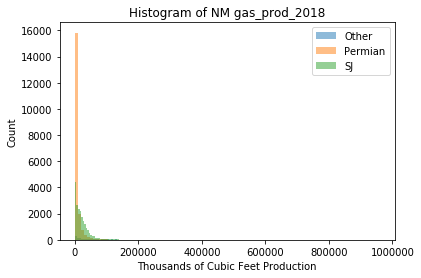

In [414]:
pyplot.hist(Other['gas_prod_2018'], bins=100, alpha=0.5, label='Other')
pyplot.hist(Permian['gas_prod_2018'], bins=100, alpha=0.5, label='Permian')
pyplot.hist(SJ['gas_prod_2018'], bins=100, alpha=0.5, label='SJ')
pyplot.legend(loc='upper right')
pyplot.title('Histogram of NM gas_prod_2018')
pyplot.xlabel('Thousands of Cubic Feet Production')
pyplot.ylabel('Count')
pyplot.show()

In [574]:
data_array = np.asarray(data)
data_array[0]

array([3000100505, '8/12/1940', '2/15/1936', 'Plugged', 'Bernalillo', nan,
       nan, nan, nan, nan, nan, 1940, 1936, 4], dtype=object)

In [350]:
data['gas_prod_2018'].describe()

count     32125.000000
mean      19203.755798
std       33279.345385
min           0.000000
25%        1212.000000
50%        8173.000000
75%       24131.000000
max      958838.000000
Name: gas_prod_2018, dtype: float64

In [109]:
data_array = np.asarray(data)
Yearly_Active = []
for i in range(1970,2020):
    Active_Well_Count = 0
    for j in range(len(data)):
        #Make sure well was drilled before on during year and plugged after year
        if data_array[j][11]>i and data_array[j][12]<=i:
            Active_Well_Count += 1
    Yearly_Active.append(Active_Well_Count)

In [118]:
 data_array.shape

(89320, 14)

In [29]:
data_array[0][12]

1936

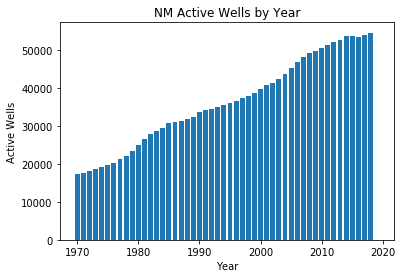

In [110]:
plt.bar(range(1970,2020),Yearly_Active)
plt.ylabel('Active Wells')
plt.xlabel('Year')
plt.title('NM Active Wells by Year')
plt.show()

In [28]:
SJ_array = np.asarray(SJ)
Yearly_Active_SJ = []
for i in range(1975,2018):
    Active_Well_Count = 0
    for j in range(len(SJ)):
        #Make sure well was drilled before on during year and plugged after year
        if SJ_array[j][11]>i and SJ_array[j][12]<=i :
            Active_Well_Count += 1
    Yearly_Active_SJ.append(Active_Well_Count)

In [103]:
SJ_array[0][12]

1955

In [104]:
SJ_array[0][11]

1959

In [29]:
Permian_array = np.asarray(Permian)
Yearly_Active_Permian = []
for i in range(1975,2018):
    Active_Well_Count = 0
    for j in range(len(Permian)):
        #Make sure well was drilled before on during year and plugged after year
        if Permian_array[j][11]>i and Permian_array[j][12]<=i :
            Active_Well_Count += 1
    Yearly_Active_Permian.append(Active_Well_Count)

In [30]:
Other_array = np.asarray(Other)
Yearly_Active_Other = []
for i in range(1975,2018):
    Active_Well_Count = 0
    for j in range(len(Other)):
        #Make sure well was drilled before on during year and plugged after year
        if Other_array[j][11]>i and Other_array[j][12]<=i :
            Active_Well_Count += 1
    Yearly_Active_Other.append(Active_Well_Count)

In [98]:
Yearly_Active_Other

[1899,
 1892,
 1882,
 1870,
 1854,
 1849,
 1845,
 1837,
 1822,
 1805,
 1760,
 1645,
 1628,
 1568,
 1513,
 1447,
 1445,
 1439,
 1437,
 1428,
 1424,
 1422,
 1421,
 1368,
 1367,
 1336,
 1312,
 1307,
 1289,
 1262,
 1198,
 1127,
 1014,
 897,
 777,
 645,
 566,
 352,
 217,
 212,
 197,
 125,
 99,
 70,
 9,
 2,
 2,
 2,
 0,
 0]

In [145]:
DF = np.zeros((3,len(Yearly_Active_Permian)))

In [146]:
DF[0] = Yearly_Active_Other
DF[1] = Yearly_Active_SJ
DF[2] = Yearly_Active_Permian

In [147]:
DF = DF.T

In [148]:
DF =  pd.DataFrame(DF)

In [149]:
#idx_rename = {'Avatar':'Ratava', 'Spectre': 'Ertceps'} 
col_rename = {0:'Other', 1: 'San Juan', 2:'Permian'}
DF_Rename = DF.rename(columns=col_rename)#index=idx_rename,

In [152]:
DF_Rename.head()

,Other,San Juan,Permian,Year
0,17.0,9126.0,8331.0,1970
1,20.0,9219.0,8551.0,1971
2,21.0,9547.0,8764.0,1972
3,20.0,9881.0,8967.0,1973
4,30.0,10121.0,9208.0,1974


In [241]:
DF_Rename.head()

,Other,San Juan,Permian,Year
0,15.0,9111.0,8074.0,1970
1,18.0,9203.0,8290.0,1971
2,19.0,9531.0,8496.0,1972
3,18.0,9863.0,8695.0,1973
4,28.0,10101.0,8934.0,1974


In [150]:
DF_Rename['Year'] = range(1970,2020)

In [151]:
DF = DF_Rename.set_index('Year')

In [31]:
Yearly_Active_Other_array = np.asarray(Yearly_Active_Other)

In [32]:
Yearly_Active_SJ_array = np.asarray(Yearly_Active_SJ)

In [33]:
Yearly_Active_Permian_array = np.asarray(Yearly_Active_Permian)

In [102]:
Yearly_Active_Permian_array

array([30798, 30573, 30354, 30152, 29901, 29637, 29358, 29042, 28678,
       28242, 27684, 26968, 26244, 25721, 25232, 24784, 24541, 24214,
       23939, 23622, 23210, 22829, 22452, 21812, 21122, 20351, 19404,
       18394, 17761, 17261, 16314, 15408, 14848, 14023, 13150, 12183,
       11188, 10393,  9442,  8771,  7815,  6692,  5495,  4379,  3154,
        2466,  2087,  1186,    86,     0])

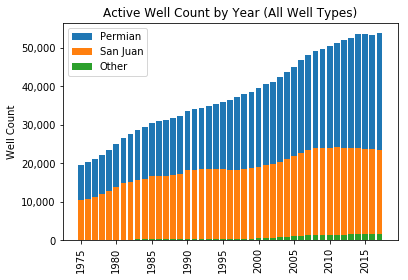

In [34]:
p1 = plt.bar(range(1975,2018),Yearly_Active_Permian_array, label ='Permian', bottom=Yearly_Active_Other_array+Yearly_Active_SJ_array)
p2 = plt.bar(range(1975,2018),Yearly_Active_SJ_array, label = 'SJ', bottom = Yearly_Active_Other_array)
p3 = plt.bar(range(1975,2018),Yearly_Active_Other_array, label = 'Other')

plt.ylabel('Well Count')
plt.title('Active Well Count by Year (All Well Types)')
plt.xticks(range(1975,2018,5),rotation='vertical')


plt.yticks(np.arange(0,60000,10000),('0','10,000','20,000','30,000','40,000','50,000','60,000')) # Set locations and labels
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0],p2[0], p3[0]), ('Permian','San Juan', 'Other'))
plt.show()

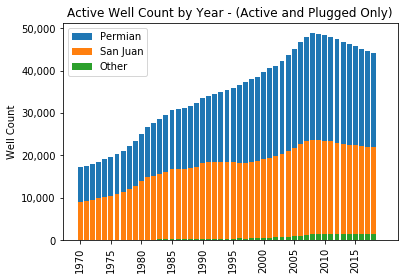

In [190]:
p1 = plt.bar(range(1970,2020),Yearly_Active_Permian_array, label ='Permian', bottom=Yearly_Active_Other_array+Yearly_Active_SJ_array)
p2 = plt.bar(range(1970,2020),Yearly_Active_SJ_array, label = 'SJ', bottom = Yearly_Active_Other_array)
p3 = plt.bar(range(1970,2020),Yearly_Active_Other_array, label = 'Other')

plt.ylabel('Well Count')
plt.title('Active Well Count by Year - (Active and Plugged Only)')
plt.xticks(range(1970,2020,5),rotation='vertical')


plt.yticks(np.arange(0,60000,10000),('0','10,000','20,000','30,000','40,000','50,000','60,000')) # Set locations and labels
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0],p2[0], p3[0]), ('Permian','San Juan', 'Other'))
plt.show()

In [191]:
DF

,Other,San Juan,Permian
Year,,,
1970,17.0,9126.0,8331.0
1971,20.0,9219.0,8551.0
1972,21.0,9547.0,8764.0
1973,20.0,9881.0,8967.0
1974,30.0,10121.0,9208.0
1975,33.0,10472.0,9457.0
1976,32.0,10821.0,9724.0
1977,35.0,11365.0,10034.0
1978,34.0,12056.0,10400.0


In [192]:
DF.to_csv('NM_Wells_AllTypes_ActiveCount.csv', encoding= 'utf8')

In [6]:
#WELL STATUS TYPES THAT INDICATE WELL WAS DEACTIVATED
inactive_types=['ABANDONED', 'INACTIVE', 'NOTICE OF INTENT TO ABANDON', 'ABANDON', 'P & A', 'PA', 'PLUGGED', 'PLUGGED & ABANDONED', 'SHUT IN', 'SHUT-IN', 'SI']

In [7]:
#selects a subset from inactive type list
inactive_wells=data[data.STATUS.isin(inactive_types)]

In [8]:
#calculate BOE/day production
inactive_wells['BOE']=(((inactive_wells.LATEST_GAS)/6)+(inactive_wells.LATEST_LIQ)/30) #BOE/DAY

C:\Users\khenk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
#plot number of wells inactivated in each year (use column year_last)

# df1 = data.groupby('year_last').count()
# df1['Unnamed: 0'].plot()
df1 = data.groupby('COMPL_STATUS').count()

In [15]:
df2 = data.groupby('COMPL_STATUS').describe()

In [13]:
df1

,ACRES,API,OPERATOR,PLUG_DATE,PRODUCING_POOLID,PROPERTY,RANGE,SDIV_UL,SECTION,SPUD_DATE,...,LATITUDE,LONGITUDE,NBR_COMPLS,NS_CD,OCD_UL,OGRID_CDE,oil_prod_2017,oil_prod_2018,oil_prod_2019,ONE_PRODUCING_POOL_NAME
COMPL_STATUS,,,,,,,,,,,,,,,,,,,,,
Active,48774,48774,48774,0,43797,48774,48774,48774,48774,43902,...,48774,48774,48774,48774,48329,48774,44599,44314,48,43797
Dry Hole,12,12,12,0,0,12,12,12,12,12,...,12,12,12,12,12,12,1,1,0,0
Never Drilled,21,21,21,0,0,21,21,21,21,0,...,21,21,21,21,19,21,0,0,0,0
New (Not drilled or compl),18949,18949,18949,0,92,18949,18949,18949,18949,10493,...,18949,18949,18949,18949,18729,18949,8413,9400,0,92
Plugged,30506,42158,42156,41996,5509,42158,42158,41942,42158,35053,...,42158,42158,30506,41626,41736,42158,1216,630,0,5509
TA,850,850,850,0,120,850,850,850,850,619,...,850,850,850,850,848,850,492,470,4,120
Zone Plugged,34,34,34,0,2,34,34,34,34,26,...,34,34,34,34,34,34,4,4,0,2
"Zones Aban, not plgd",8,8,8,0,6,8,8,8,8,8,...,8,8,8,8,8,8,5,5,0,6


In [17]:
df2

ACRES                                        \
                              count        mean         std    min    25%   
COMPL_STATUS                                                                
Active                      48774.0  214.702583  193.777145   0.00   40.0   
Dry Hole                       12.0  109.995833  126.627228  40.00   40.0   
Never Drilled                  21.0   43.809524   12.031704  40.00   40.0   
New (Not drilled or compl)  18949.0  212.821131  314.151979   0.00   40.0   
Plugged                     30506.0   70.598567   93.131850  24.16   40.0   
TA                            850.0   99.082212  148.177394  35.19   40.0   
Zone Plugged                   34.0   52.941176   41.453107  40.00   40.0   
Zones Aban, not plgd            8.0  228.743750  128.663113  40.00  130.0   

                                                            API                \
                                50%       75%      max    count          mean   
COMPL_STATUS                                                                    
Active                      160.000  320.0000  1920.00  48774.0  3.002952e+09   
Dry Hole                     40.000  109.9875   320.00     12.0  3.001494e+09   
Never Drilled                40.000   40.0000    80.00     21.0  3.002272e+09   
New (Not drilled or compl)  160.000  320.0000  9237.30  18949.0  3.002221e+09   
Plugged                      40.000   40.0000  1601.28  42158.0  3.002638e+09   
TA                           40.000   40.0000   644.60    850.0  3.002427e+09   
Zone Plugged                 40.000   40.0000   240.00     34.0  3.002572e+09   
Zones Aban, not plgd        314.975  320.0000   320.00      8.0  3.002711e+09   

                            ... oil_prod_2018           oil_prod_2019  \
                            ...           75%       max         count   
COMPL_STATUS                ...                                         
Active                      ...         331.0  266871.0          48.0   
Dry Hole                    ...         873.0     873.0           0.0   
Never Drilled               ...           NaN       NaN           0.0   
New (Not drilled or compl)  ...       17743.5  683476.0           0.0   
Plugged                     ...           0.0   49859.0           0.0   
TA                          ...         953.5   47398.0           4.0   
Zone Plugged                ...        4505.5   10873.0           0.0   
Zones Aban, not plgd        ...        1506.0    2134.0           0.0   

                                                                          \
                               mean         std  min   25%   50%     75%   
COMPL_STATUS                                                               
Active                      267.875  667.703961  0.0  0.75  48.5  271.25   
Dry Hole                        NaN         NaN  NaN   NaN   NaN     NaN   
Never Drilled                   NaN         NaN  NaN   NaN   NaN     NaN   
New (Not drilled or compl)      NaN         NaN  NaN   NaN   NaN     NaN   
Plugged                         NaN         NaN  NaN   NaN   NaN     NaN   
TA                           26.500   53.000000  0.0  0.00   0.0   26.50   
Zone Plugged                    NaN         NaN  NaN   NaN   NaN     NaN   
Zones Aban, not plgd            NaN         NaN  NaN   NaN   NaN     NaN   

                                    
                               max  
COMPL_STATUS                        
Active                      3652.0  
Dry Hole                       NaN  
Never Drilled                  NaN  
New (Not drilled or compl)     NaN  
Plugged                        NaN  
TA                           106.0  
Zone Plugged                   NaN  
Zones Aban, not plgd           NaN  

[8 rows x 224 columns]

(447431, 18)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000168033E49B0>]],
      dtype=object)

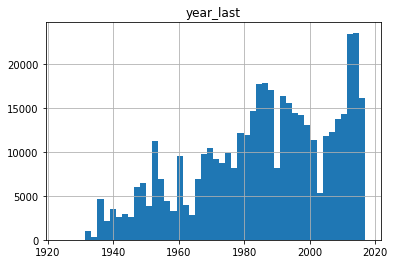

In [47]:
print(inactive_wells[inactive_wells['BOE']>=16].shape)
inactive_wells[inactive_wells['BOE']>=16].hist(column='year_last', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A87AC19DD8>]],
      dtype=object)

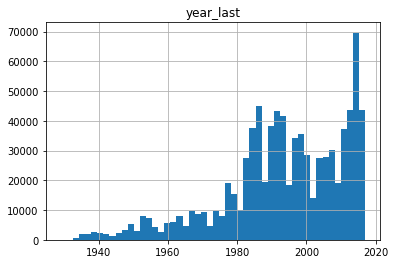

In [39]:
inactive_wells[inactive_wells['BOE']].hist(column='year_last', bins=50)

In [11]:
#inactive_wells.hist(column ='BOE', range=(min(inactive_wells['BOE']),max(inactive_wells['BOE'])),bins=50)
x = np.asarray(inactive_wells['BOE'])
# len(inactive_wells['BOE'])
# inactive_wells['BOE'].min
# inactive_wells['BOE'].max
min(x)

x=x.astype(int)
min(x)
max(x)

113312187

(array([1.297309e+06, 6.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([-2.24890000e+04,  1.13109786e+07,  2.26444462e+07,  3.39779138e+07,
         4.53113814e+07,  5.66448490e+07,  6.79783166e+07,  7.93117842e+07,
         9.06452518e+07,  1.01978719e+08,  1.13312187e+08]),
 <a list of 10 Patch objects>)

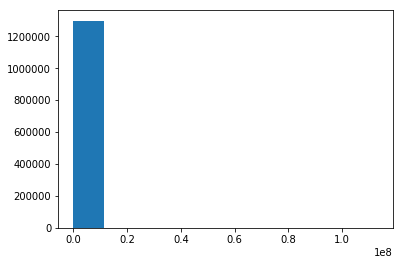

In [12]:
plt.hist(x)

In [13]:
inactive_wells


,Unnamed: 0,API_NO,COUNTY,ENTITY_ID,FIRST_PROD_DATETIME,GAS_CUM,GAS_GRAV,LAST_PROD_DATETIME,LATEST_GAS,LATEST_LIQ,LIQ_CUM,LIQ_GRAV,MONTHS_PRODUCED,STATE,STATUS,year_first,year_last,BOE
0,0,50-733-10052-00,(N/A) (AK),104324236,1965-07-01,NaN,NaN,1965-07-01,515.000000,1684.000000,NaN,NaN,NaN,AK,P & A,1965,1965,141.966667
1,1,50-733-10063-00,(N/A) (AK),104324261,1965-07-01,NaN,NaN,1965-07-01,0.000000,1402.000000,NaN,NaN,NaN,AK,P & A,1965,1965,46.733333
2,2,50-733-10044-00,(N/A) (AK),104324230,1965-11-01,NaN,NaN,1965-11-01,0.000000,1324.000000,NaN,NaN,NaN,AK,P & A,1965,1965,44.133333
3,3,50-733-10066-00,(N/A) (AK),129778149,1965-11-01,NaN,NaN,1965-11-01,0.000000,1159.000000,NaN,NaN,NaN,AK,P & A,1965,1965,38.633333
4,4,50-733-10064-00,(N/A) (AK),104324262,1965-11-01,NaN,NaN,1965-12-01,0.000000,119.000000,NaN,NaN,NaN,AK,P & A,1965,1965,3.966667
5,5,50-733-10081-00,(N/A) (AK),129778088,1965-12-01,NaN,NaN,1971-07-01,260.000000,302.000000,NaN,NaN,NaN,AK,P & A,1965,1971,53.400000
6,6,50-733-10082-00,(N/A) (AK),129778090,1965-12-01,NaN,NaN,1995-05-01,310.000000,479.000000,NaN,NaN,NaN,AK,P & A,1965,1995,67.633333
7,7,50-733-10084-00,(N/A) (AK),129778093,1965-12-01,NaN,NaN,1981-01-01,0.000000,1509.000000,NaN,NaN,NaN,AK,P & A,1965,1981,50.300000
8,8,50-733-10085-00,(N/A) (AK),129778075,1966-02-01,NaN,NaN,1984-07-01,0.000000,80.000000,NaN,NaN,NaN,AK,P & A,1966,1984,2.666667
9,9,50-733-10073-00,(N/A) (AK),129778155,1966-04-01,NaN,NaN,2003-06-01,939.000000,1248.000000,NaN,NaN,NaN,AK,SHUT IN,1966,2003,198.100000


In [33]:
inactive_wells['BOE'].describe()

count    1.297317e+06
mean     7.613920e+02
std      1.159499e+05
min     -2.248950e+04
25%      5.666667e-01
50%      4.666667e+00
75%      3.800000e+01
max      1.133122e+08
Name: BOE, dtype: float64

In [36]:
max(x)

113312187.83333334

In [13]:
849886+446616+815

1297317

In [26]:
from scipy import stats
NO_OUt = inactive_wells['BOE'][(np.abs(stats.zscore(inactive_wells['BOE'])) < 3).all()]

In [27]:
NO_OUt

141.96666666666667

In [30]:
inactive_wells['BOE']

46.733333333333334

In [31]:
find(inactive_wells['BOE']<16)

NameError: name 'find' is not defined